### Análise de dados visuais

Esse notebook é para produção de visualizações focadas nos datasets. A ideia é investigar de forma proativa e gerar visuais profissionais e bem estruturados para leitura geral. As informações aqui contidas possuem como fonte o site Oracle's Elixir.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.animation import FuncAnimation

full_data = pd.read_csv("../data/full_data/2025_LoL_esports_match_data_from_OraclesElixir (1).csv")

player_full_data = full_data[(full_data["position"] != "team") & (full_data["datacompleteness"] == "complete")]

C:\Users\yandrade\AppData\Local\Temp\ipykernel_5168\837643502.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv("../data/full_data/2025_LoL_esports_match_data_from_OraclesElixir (1).csv")


In [15]:
wizer_xp_data = player_full_data[player_full_data["playername"] == "Tatu"]["xpdiffat10"]

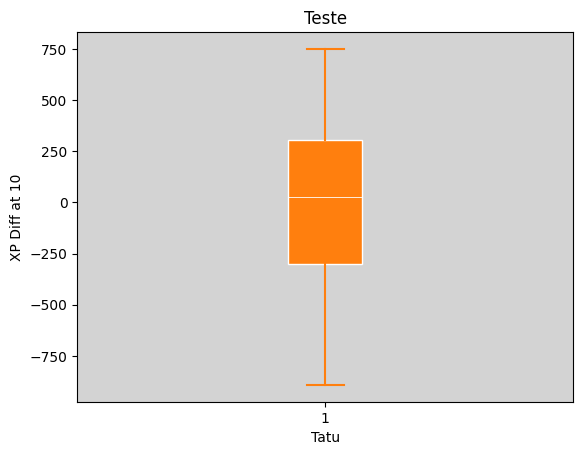

In [16]:
# Teste de visualização e estilização simples
fig, ax = plt.subplots()

dataviz = ax.boxplot(
    wizer_xp_data, 
    showmeans=False,
    showfliers=False, # Remove os outliers da visualização
    patch_artist=True,
    medianprops={"color":"white","linewidth":"0.6"},
    boxprops={"facecolor": "C1","edgecolor":"white"},
    whiskerprops={"color":"C1","linewidth":1.5},
    capprops={"color":"C1","linewidth":1.5},
    )

ax.set_title("Teste")
ax.set_xlabel("Tatu")
ax.set_ylabel("XP Diff at 10")
ax.set_facecolor("lightgray")
#ax.grid()

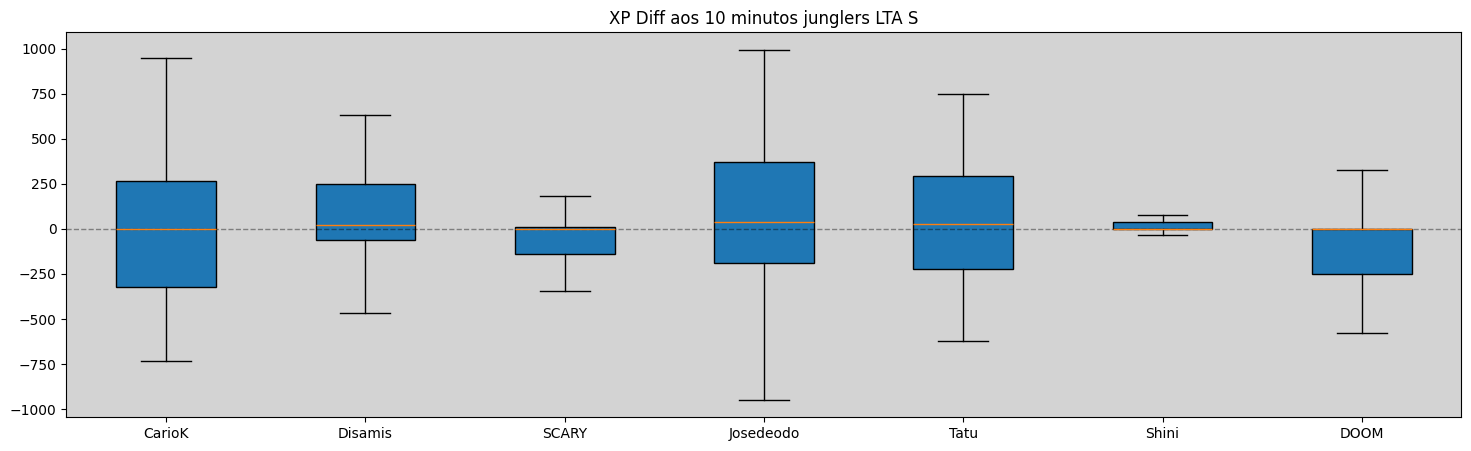

In [17]:
# Realizando um teste de plotagem
jng_data = player_full_data[(player_full_data["position"] == "jng") & (player_full_data["league"] == "LTA S")]

# Criando listas q eu vão servir para alimentar um DF
playername = []
xpdata = []

# Alimentando as listas com os dados iniciais
for player in jng_data["playername"].unique():
    data = jng_data[jng_data["playername"] == player]["xpdiffat10"].values

    playername.append(player)
    xpdata.append(data)

# Transformando e ajustando DataFrame para que as colunas sejam o nome dos jogadores e não hajam dados NaN
a = pd.DataFrame(xpdata,index=playername)
a = a.T.fillna(0)

# Começo da plotagem
fig, ax = plt.subplots(figsize=(18,5))

ax.boxplot(
    a[["CarioK","Disamis","SCARY","Josedeodo","Tatu","Shini","DOOM"]],
    showfliers=False,
    patch_artist=True,
    showmeans=False,
    tick_labels=["CarioK","Disamis","SCARY","Josedeodo","Tatu","Shini","DOOM"]
)

ax.set_facecolor("lightgray")

plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.4)
plt.title("XP Diff aos 10 minutos junglers LTA S")
plt.show()

In [18]:
columns = ["xpdiffat10","xpdiffat15","xpdiffat20","xpdiffat25"]
lista1 = []
lista2 = {"xpdiffat10":[],"xpdiffat15":[],"xpdiffat20":[],"xpdiffat25":[]}


for player in jng_data["playername"].unique():
    for column in columns: 
        data = jng_data[jng_data["playername"] == player][column].values

        lista2[column].append(data)
    
    lista1.append(player)


In [19]:
data = pd.DataFrame(data=lista2,index=lista1)

data.head(3)

,xpdiffat10,xpdiffat15,xpdiffat20,xpdiffat25
Wiz,"[-375.0, -428.0, -47.0, -834.0, -319.0, -268.0...","[-441.0, -833.0, 533.0, -315.0, 308.0, 94.0, 4...","[-690.0, -346.0, -7.0, -893.0, 1777.0, -63.0, ...","[-730.0, -1153.0, -505.0, -1234.0, 2459.0, -17..."
CarioK,"[375.0, 428.0, 47.0, -349.0, 229.0, -733.0, -2...","[441.0, 833.0, -533.0, 49.0, 581.0, -512.0, -4...","[690.0, 346.0, 7.0, 283.0, 818.0, -318.0, -115...","[730.0, 1153.0, 505.0, 314.0, 1182.0, -876.0, ..."
Disamis,"[95.0, 630.0, 195.0, 834.0, 319.0, 268.0, -122...","[686.0, 742.0, 832.0, 315.0, -308.0, -94.0, 46...","[-599.0, 2481.0, 804.0, 893.0, -1777.0, 63.0, ...","[-1666.0, 3662.0, 583.0, 1234.0, -2459.0, 170...."


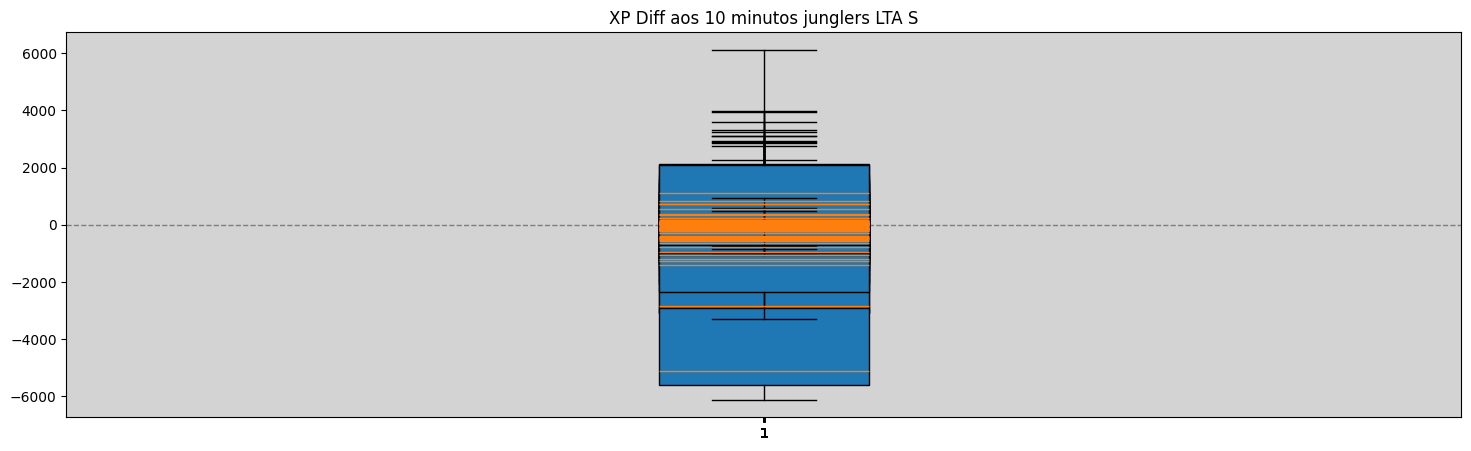

In [20]:
# A visualização plota de uma vez só os dados de todas as colunas para cada jogador
# Eu preciso fazer com que ela plote ao mesmo tempo para todos os jogadores, coluna a coluna

fig, ax = plt.subplots(figsize=(18,5))

for player in data.index:
    for column in data.columns:
        ax.boxplot(
            data.loc[player][column],
            showfliers=False,
            patch_artist=True,
            showmeans=False,
        )

# Não consigo "separar" os plots dentro dos ticklabels. Tudo fica junto.

ax.set_facecolor("lightgray")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.4)
plt.title("XP Diff aos 10 minutos junglers LTA S")
plt.show()

In [21]:
data.loc[["CarioK","Disamis","SCARY","Josedeodo","Tatu","Shini","DOOM"]]

,xpdiffat10,xpdiffat15,xpdiffat20,xpdiffat25
CarioK,"[375.0, 428.0, 47.0, -349.0, 229.0, -733.0, -2...","[441.0, 833.0, -533.0, 49.0, 581.0, -512.0, -4...","[690.0, 346.0, 7.0, 283.0, 818.0, -318.0, -115...","[730.0, 1153.0, 505.0, 314.0, 1182.0, -876.0, ..."
Disamis,"[95.0, 630.0, 195.0, 834.0, 319.0, 268.0, -122...","[686.0, 742.0, 832.0, 315.0, -308.0, -94.0, 46...","[-599.0, 2481.0, 804.0, 893.0, -1777.0, 63.0, ...","[-1666.0, 3662.0, 583.0, 1234.0, -2459.0, 170...."
SCARY,"[-95.0, -630.0, -195.0, 349.0, -229.0, 733.0, ...","[-686.0, -742.0, -832.0, -49.0, -581.0, 512.0,...","[599.0, -2481.0, -804.0, -283.0, -818.0, 318.0...","[1666.0, -3662.0, -583.0, -314.0, -1182.0, 876..."
Josedeodo,"[-67.0, -378.0, -28.0, 369.0, 330.0, 376.0, 19...","[438.0, -398.0, 935.0, 180.0, -342.0, 1481.0, ...","[194.0, -817.0, 1156.0, 858.0, -796.0, 2642.0,...","[989.0, -1293.0, 2515.0, -76.0, -1209.0, nan, ..."
Tatu,"[67.0, 378.0, 28.0, -194.0, 386.0, 272.0, 655....","[-438.0, 398.0, -935.0, 519.0, 1337.0, 498.0, ...","[-194.0, 817.0, -1156.0, 1850.0, 2684.0, 1159....","[-989.0, 1293.0, -2515.0, 1982.0, 3944.0, 2553..."
Shini,"[513.0, 436.0, 250.0, 637.0, 95.0, 167.0, 623....","[258.0, 333.0, -543.0, 1354.0, -38.0, 109.0, -...","[1004.0, 182.0, -1305.0, 839.0, -495.0, 1314.0...","[-117.0, 1075.0, -993.0, 491.0, 313.0, 3230.0,..."
DOOM,"[-513.0, 62.0, -182.0, 51.0, -580.0, -497.0, -...","[-258.0, 233.0, -100.0, 207.0, -1182.0, -661.0...","[-1004.0, 285.0, -207.0, -1615.0, -1311.0, -25...","[117.0, -148.0, -542.0, -2297.0, -945.0, -1842..."


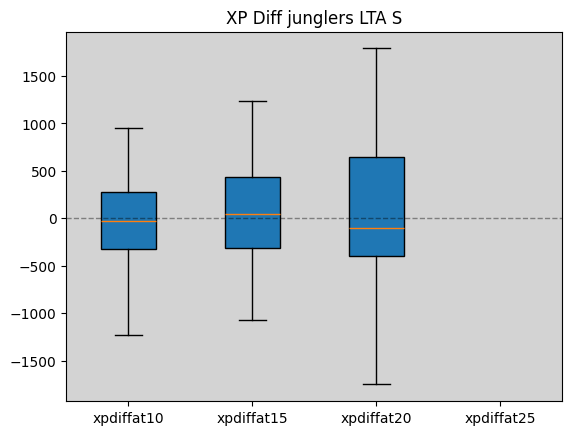

In [22]:
fig, ax = plt.subplots()

ax.boxplot(
        data.loc["CarioK"][["xpdiffat10","xpdiffat15","xpdiffat20","xpdiffat25"]],
        showfliers=False,
        patch_artist=True,
        showmeans=False,
        tick_labels=["xpdiffat10","xpdiffat15","xpdiffat20","xpdiffat25"]
        )
ax.set_facecolor("lightgray")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.4)
plt.title("XP Diff junglers LTA S")
plt.show()

In [23]:
data.shape

(16, 4)

[array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., -3087., -1397.,   117., -3302., -2108.,
       -1250.]), array([ 2590., -1065., -2355., 

c:\Users\yandrade\AppData\Local\miniconda3\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


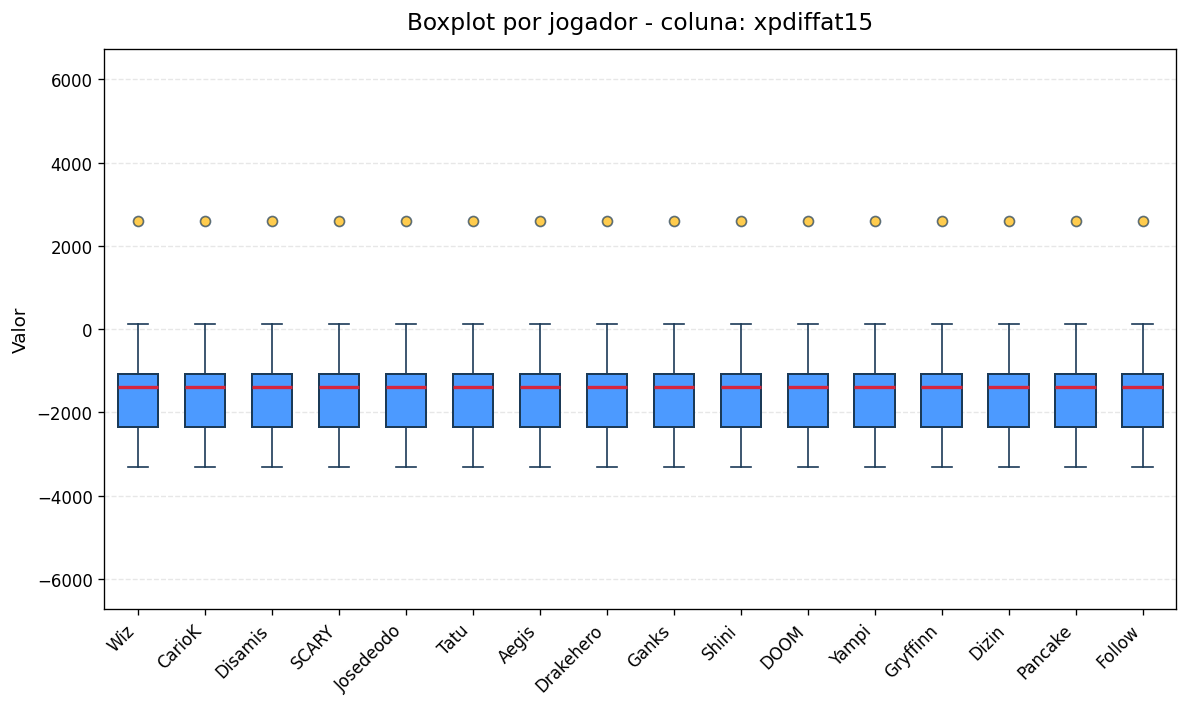

In [ ]:
interval_ms = 0.0001
dpi = 120
titulo_base = "Boxplot por jogador - coluna: {col}"

n_rows, n_cols = data.shape

def to_float_array(x):
    arr = np.asarray(x, dtype=float)
    arr = arr[np.isfinite(arr)]
    return arr

colunas = list(data.columns)

valores_globais = []
for col in colunas:
    for cel in data[col]:
        a = to_float_array(cel)
        if a.size > 0:
            valores_globais.append(a)
if len(valores_globais) == 0:
    raise ValueError("Não há valores aqui")

y_min = min(np.min(a) for a in valores_globais)
y_max = max(np.max(a) for a in valores_globais)
y_pad = max(1.0, 0.05 * (y_max - y_min))



fig, ax = plt.subplots(dpi=dpi, figsize=(10,6))

x_positions = np.arange(1, n_rows + 1)
x_labels = list(data.index)



def plot_coluna(idx_col):
    ax.clear()

    arrays = [to_float_array(data.iloc[i, idx_col]) for i in range(n_rows)]
    arrays = [a if a.size > 0 else np.array([np.nan]) for i in arrays]

    print(arrays)

    bp = ax.boxplot(
        arrays,
        positions=x_positions,
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor="#4C9AFF", edgecolor="#1B3A57", linewidth=1.2),
        medianprops=dict(color="#D7263D", linewidth=2),
        whiskerprops=dict(color="#1B3A57"),
        capprops=dict(color="#1B3A57"),
        flierprops=dict(marker='o', markerfacecolor="#FFB703", markeredgecolor="#1B3A57", alpha=0.7)
    )



    
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=10)
    ax.set_title(titulo_base.format(col=colunas[idx_col]), fontsize=14, pad=12)
    ax.set_ylabel("Valor", fontsize=11)
    
    ax.set_ylim(y_min - y_pad, y_max + y_pad)

    # Grade leve para facilitar leitura
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)

    # Margens e layout
    ax.margins(x=0.02)
    fig.tight_layout()

# Inicializa com a primeira coluna (mas não continua depois dela)
plot_coluna(0)

# Função de atualização
def update(frame):
    i = frame % len(colunas)
    plot_coluna(i)

# Cria animação
anim = FuncAnimation(fig, update(1), frames=len(colunas), interval=interval_ms, repeat=True)

plt.show()